# Experimentando classificação com diferentes _datasets_

Utilizando o dataset de toras previamente cortadas para treino.

Utilizando o dataset de toras cortadas pelos algoritmos de preprocessamento em `./img_edit.py`.

Utilizando melhor combinação de fatores para calculo do LBP:
  - utilizando 8 pontos;
  - aplicando limiar de otsu para menores.

## Importando bibliotecas

## Analisando desempenho com KNN

> Descomente _imports_ caso não tenha executado células superiores

In [1]:
# # importado de células anteriores
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearnex import patch_sklearn
patch_sklearn() # Deve ser chamada antes dos imports no sklearn

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# valor dos arquivos csv gerados de
TESTE = 5
TREINO = 6

N_POINTS = 8
FUNC_NAME = 'menor'

TRAIN_NAMES = ['broca', 'fissura', 'musgo', 'quebra']
TARGET_NAMES = ['normal', 'broca', 'fissura', 'musgo']
MATCH_CLASSES = ['broca', 'fissura', 'musgo']

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Para 8 pontos:
              precision    recall  f1-score   support

       broca   0.393258  0.388889  0.391061        90
     fissura   0.338983  0.222222  0.268456        90
       musgo   0.450820  0.611111  0.518868        90

    accuracy                       0.407407       270
   macro avg   0.394354  0.407407  0.392795       270
weighted avg   0.394354  0.407407  0.392795       270



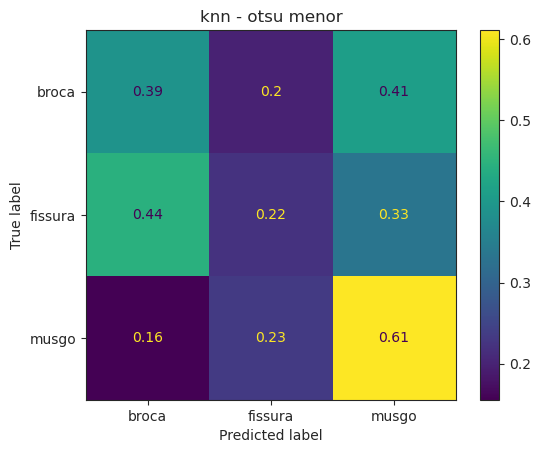

              precision    recall  f1-score   support

       broca   0.386364  0.377778  0.382022        90
     fissura   0.319149  0.166667  0.218978        90
       musgo   0.518519  0.777778  0.622222        90

    accuracy                       0.440741       270
   macro avg   0.408010  0.440741  0.407741       270
weighted avg   0.408010  0.440741  0.407741       270



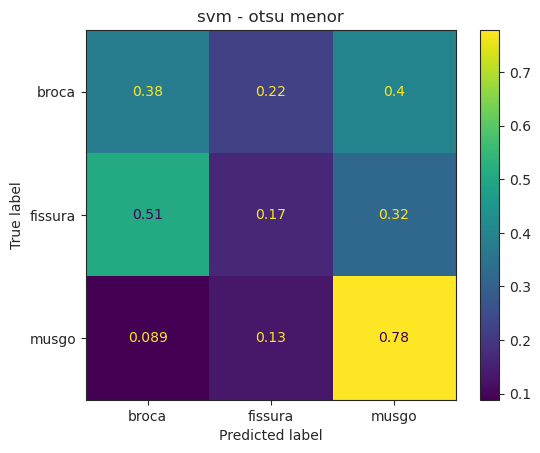

In [2]:
sns.set_style('ticks')

COLUMNS = ['acc','classificador']
combinations = []

classificadores = [
  ('knn', KNeighborsClassifier()),
  ('svm', make_pipeline(StandardScaler(),
                        SVC(cache_size=600)))
]

print(f'Para {N_POINTS} pontos:')

# classes: {0:'broca', 1:'fissura', 2:'musgo', 3:'quebra'}
data_treino = pd.read_csv(f'./csvs/prepro_{TREINO}-{FUNC_NAME}-P{N_POINTS}.csv')

# Cortando metade das classes fissura e quebra para juntá-las sob fissura
X = []
for target in range(4):
  busca = data_treino.query(f'target=={target}')
  if target == 1 or target == 3:
    n = len(busca)
    busca = busca[:n//2]
    if target == 3:
      busca['target'] = 1
  X.append(busca)

data_treino = pd.concat(X)
# print(data_treino['target'].value_counts(sort=False))

y_train = data_treino.pop('target').values
X_train = data_treino.values

# classes: {0:'normal', 1:'broca', 2:'fissura', 3:'musgo'} # filtrando (removendo) classe normal
data_teste = pd.read_csv(f'./csvs/prepro_{TESTE}-{FUNC_NAME}-P{N_POINTS}.csv').query('target != 0')
y_test = data_teste.pop('target').values
X_test = data_teste.values

# classes: {0:'broca', 1:'fissura', 2:'musgo'}
y_test -= 1 # corrigindo valores das classes para correspondência entre datasets

for i, (clf_name, clf) in enumerate(classificadores):
  # Treinando classificador
  clf.fit(X_train, y_train)

  combinations.append([
    clf.score(X_test, y_test),
    clf_name])

  y_pred = clf.predict(X_test)
  print(
    classification_report(
      y_true=y_test,
      y_pred=y_pred,
      digits=6,
      target_names=MATCH_CLASSES))

  ConfusionMatrixDisplay.from_estimator(
    estimator=clf,
    X=X_test,
    y=y_test,
    normalize='true',
    display_labels=MATCH_CLASSES
    ).ax_.set_title(f'{clf_name} - otsu {FUNC_NAME}')

  plt.show()

Para 8 pontos:
              precision    recall  f1-score   support

       broca   0.331808  0.486577  0.394558       298
     fissura   0.363128  0.436242  0.396341       298
       musgo   0.737374  0.244966  0.367758       298

    accuracy                       0.389262       894
   macro avg   0.477437  0.389262  0.386219       894
weighted avg   0.477437  0.389262  0.386219       894



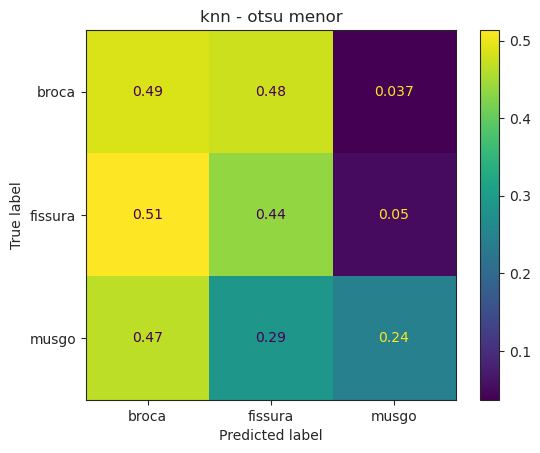

              precision    recall  f1-score   support

       broca   0.367609  0.479866  0.416303       298
     fissura   0.369128  0.369128  0.369128       298
       musgo   0.695652  0.483221  0.570297       298

    accuracy                       0.444072       894
   macro avg   0.477463  0.444072  0.451909       894
weighted avg   0.477463  0.444072  0.451909       894



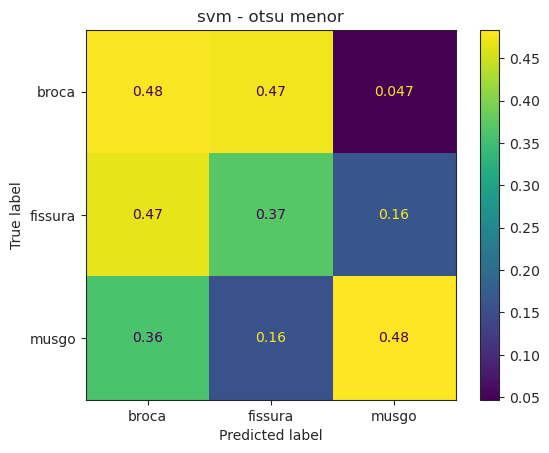

In [3]:
sns.set_style('ticks')

COLUMNS = ['acc','classificador']
combinations = []

classificadores = [
  ('knn', KNeighborsClassifier()),
  ('svm', make_pipeline(StandardScaler(),
                        SVC(cache_size=600)))
]

print(f'Para {N_POINTS} pontos:')

# classes: {0:'broca', 1:'fissura', 2:'musgo', 3:'quebra'}
data_treino = pd.read_csv(f'./csvs/prepro_{TREINO}-{FUNC_NAME}-P{N_POINTS}.csv')

# Cortando metade das classes fissura e quebra para juntá-las sob fissura
X = []
for target in range(4):
  busca = data_treino.query(f'target=={target}')
  if target == 1 or target == 3:
    n = len(busca)
    busca = busca[:n//2]
    if target == 3:
      busca['target'] = 1
  X.append(busca)

data_treino = pd.concat(X)
# print(data_treino['target'].value_counts(sort=False))

y_test = data_treino.pop('target').values
X_test = data_treino.values

# classes: {0:'normal', 1:'broca', 2:'fissura', 3:'musgo'} # filtrando (removendo) classe normal
data_teste = pd.read_csv(f'./csvs/prepro_{TESTE}-{FUNC_NAME}-P{N_POINTS}.csv').query('target != 0')
y_train = data_teste.pop('target').values -1 # corrigindo valores das classes para correspondência entre datasets
X_train = data_teste.values

for i, (clf_name, clf) in enumerate(classificadores):
  # Treinando classificador
  clf.fit(X_train, y_train)

  combinations.append([
    clf.score(X_test, y_test),
    clf_name])

  y_pred = clf.predict(X_test)
  print(
    classification_report(
      y_true=y_test,
      y_pred=y_pred,
      digits=6,
      target_names=MATCH_CLASSES))

  ConfusionMatrixDisplay.from_estimator(
    estimator=clf,
    X=X_test,
    y=y_test,
    normalize='true',
    display_labels=MATCH_CLASSES
    ).ax_.set_title(f'{clf_name} - otsu {FUNC_NAME}')

  plt.show()